<a href="https://colab.research.google.com/github/99sambhav/Category-wise-Scraper-Tool-Web-Scraping-tool/blob/main/Radish_w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
# from pmdarima import auto_arima
warnings.filterwarnings('ignore')
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/database_uber /freshOk_vegi_data (1).csv')
data=data.dropna()
data.mean().sort_values()[-10:-1]

Spinach                   6.660714
Cabbage- Pattagobhi       6.964286
Radish - white           11.500000
Carrot - Halwa           13.678571
CauliflowerPhoolgobhi    14.946429
Carrot                   15.955357
Tomato - Desi            20.107143
Peas- Matar              24.205357
Onion                    24.642857
dtype: float64

In [ ]:
data['Date']= pd.to_datetime(data['Date'],dayfirst=True)
data.set_index(data['Date'], inplace= True)
data.asfreq(pd.infer_freq(data.index))
data.drop('Date',inplace=True, axis=1)

In [ ]:
aba= 'Radish - white'
type1= pd.DataFrame(data[aba])

In [ ]:
type1[aba].sort_values()

Date
2021-02-21     0.0
2021-01-22     2.0
2021-02-19     3.0
2021-01-21     4.0
2021-02-25     5.0
2021-01-12     5.0
2021-01-14     5.0
2021-02-22     6.0
2021-02-17     7.0
2021-02-16     7.0
2021-02-24     7.0
2021-01-27     7.0
2021-01-15     7.0
2021-02-20     8.0
2021-01-11     8.0
2021-02-01     9.0
2021-01-01     9.0
2021-02-08    10.0
2021-01-17    10.0
2021-01-10    10.0
2021-01-08    11.0
2021-01-09    11.0
2021-01-26    11.0
2021-01-25    11.0
2021-01-07    11.0
2021-01-19    11.0
2021-01-28    12.0
2021-01-29    12.0
2021-02-10    12.0
2021-02-14    12.0
2021-01-20    12.0
2021-01-24    12.0
2021-02-12    13.0
2021-02-11    13.0
2021-02-09    13.0
2021-01-23    13.0
2021-02-23    13.0
2021-01-02    13.0
2021-01-04    14.0
2021-01-30    14.0
2021-01-06    14.0
2021-02-18    14.0
2021-02-07    15.0
2021-02-02    15.0
2021-01-31    15.0
2021-01-05    15.0
2021-01-18    16.0
2021-02-05    16.0
2021-01-13    16.0
2021-02-15    16.0
2021-02-13    17.0
2021-01-16    17.0
2021-02

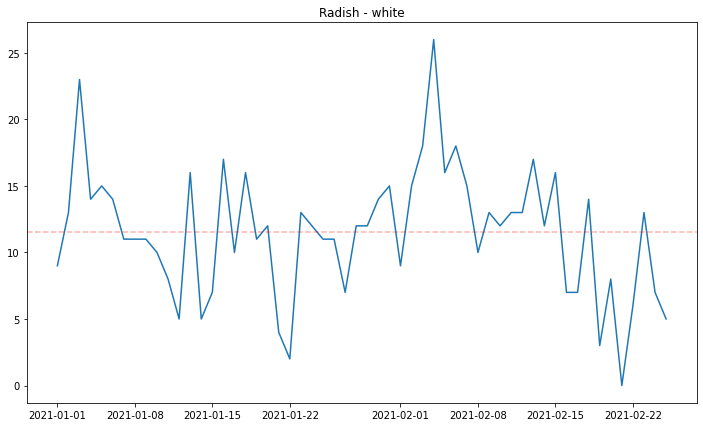

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(type1[aba])
plt.title(aba)
plt.axhline(type1[aba].mean(), color='r',alpha=0.3, linestyle='--')

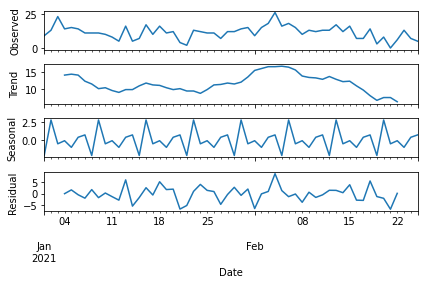

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(type1[aba], model="additive")
decompose_data.plot();

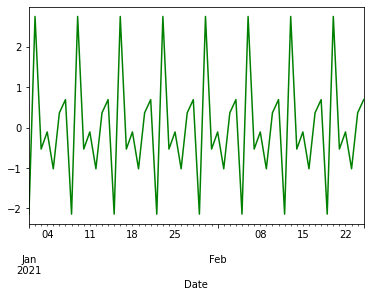

In [ ]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [ ]:
result= adfuller(type1[aba])
print(result[1])
### very good p value slightly over difference, will balance it through adding more ma terms

0.016455070812608358


In [ ]:
type1['first']= type1[aba]-type1[aba].shift(1)
type1['first'].dropna(inplace=True)
result= adfuller(type1['first'].dropna())
print(result[1])

5.000376340665027e-07


In [ ]:
type1['log']= np.log(type1[aba])
type1['log']=type1['log'].drop('2021-02-21')
type1['log']

Date
2021-01-01    2.197225
2021-01-02    2.564949
2021-01-03    3.135494
2021-01-04    2.639057
2021-01-05    2.708050
2021-01-06    2.639057
2021-01-07    2.397895
2021-01-08    2.397895
2021-01-09    2.397895
2021-01-10    2.302585
2021-01-11    2.079442
2021-01-12    1.609438
2021-01-13    2.772589
2021-01-14    1.609438
2021-01-15    1.945910
2021-01-16    2.833213
2021-01-17    2.302585
2021-01-18    2.772589
2021-01-19    2.397895
2021-01-20    2.484907
2021-01-21    1.386294
2021-01-22    0.693147
2021-01-23    2.564949
2021-01-24    2.484907
2021-01-25    2.397895
2021-01-26    2.397895
2021-01-27    1.945910
2021-01-28    2.484907
2021-01-29    2.484907
2021-01-30    2.639057
2021-01-31    2.708050
2021-02-01    2.197225
2021-02-02    2.708050
2021-02-03    2.890372
2021-02-04    3.258097
2021-02-05    2.772589
2021-02-06    2.890372
2021-02-07    2.708050
2021-02-08    2.302585
2021-02-09    2.564949
2021-02-10    2.484907
2021-02-11    2.564949
2021-02-12    2.564949
2021-0

In [ ]:
result= adfuller(type1['log'].dropna())
print(result[1])

4.475446477911957e-06


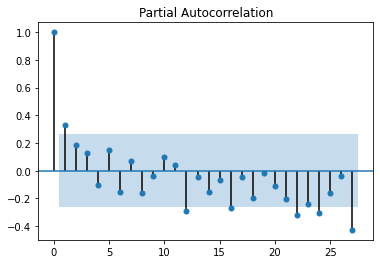

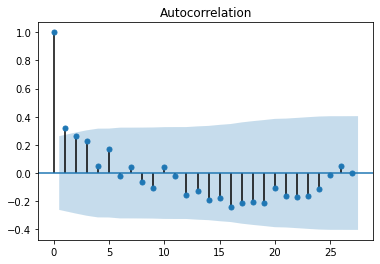

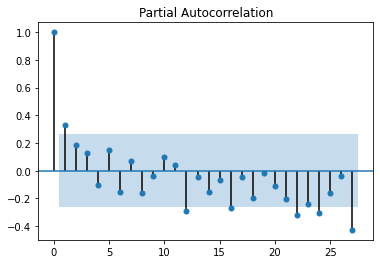

In [ ]:
plot_acf(type1[aba].dropna(), lags=27)
plot_pacf(type1[aba].dropna(), lags=27)

In [ ]:
arima_model = ARIMA(type1[aba], order=(16,0,2))
arima_model_fit = arima_model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(arima_model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:         Radish - white   No. Observations:                   56
Model:                    ARMA(12, 2)   Log Likelihood                -164.584
Method:                       css-mle   S.D. of innovations                nan
Date:                Sat, 18 Jun 2022   AIC                            361.167
Time:                        08:55:57   BIC                            393.573
Sample:                    01-01-2021   HQIC                           373.731
                         - 02-25-2021                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.9967        nan        nan        nan         nan         nan
ar.L1.Radish - white      0.3883        nan        nan        nan         nan         nan
ar.L2.Ra

In [ ]:
train_data= type1[aba][0:44]
test_data= type1[aba][44:-1]

<Figure size 1440x864 with 0 Axes>

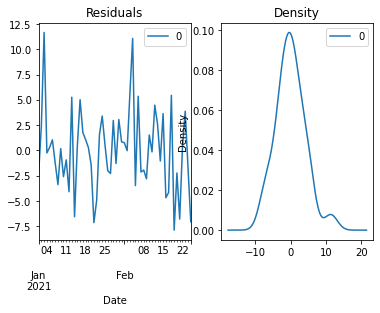

In [ ]:
plt.figure(figsize=(20,12))
residuals = pd.DataFrame(arima_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<Figure size 1440x864 with 0 Axes>

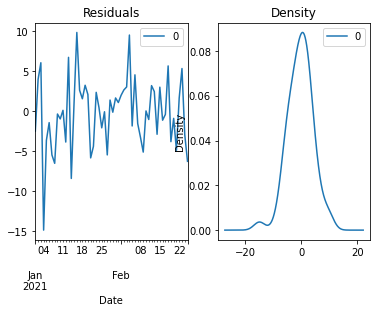

In [ ]:
plt.figure(figsize=(20,12))
residuals = pd.DataFrame(arima_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
predictions=arima_model_fit.predict(start=pred_start_date,end=pred_end_date)

In [ ]:
predictions=arima_model_fit.predict(start=pred_start_date,end=pred_end_date)

Text(0, 0.5, 'Sales')

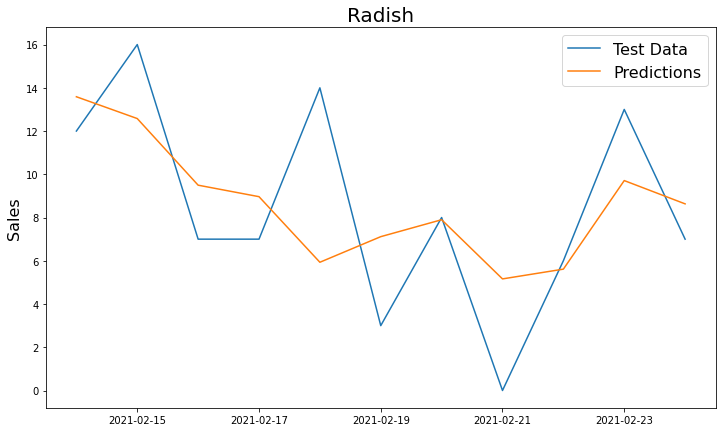

In [ ]:

plt.figure(figsize=(12,7))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

plt.title('Radish', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
residual=((test_data-(predictions))**2).mean()

print(residual)

12.002374826091712


In [ ]:
residual=((test_data-(predictions))**2).mean()

print(residual)

13.332396970065021


In [ ]:
from datetime import datetime
from pandas.tseries.offsets import DateOffset
future_dates = [type1.index[-1] + DateOffset(days= x) for x in range(0,10)]
future_dates_df = pd.DataFrame(index = future_dates[1:], columns= type1.columns)
future_df = pd.concat([type1, future_dates_df])
future_df

,Radish - white,log
2021-01-01,9.0,2.197225
2021-01-02,13.0,2.564949
2021-01-03,23.0,3.135494
2021-01-04,14.0,2.639057
2021-01-05,15.0,2.708050
...,...,...
2021-03-02,NaN,NaN
2021-03-03,NaN,NaN
2021-03-04,NaN,NaN
2021-03-05,NaN,NaN


In [ ]:
future_df[aba+'_forecast']=arima_model_fit.predict(start=55,end=65,dynamic=True)

Text(0.5, 1.0, 'Radish - white forecast')

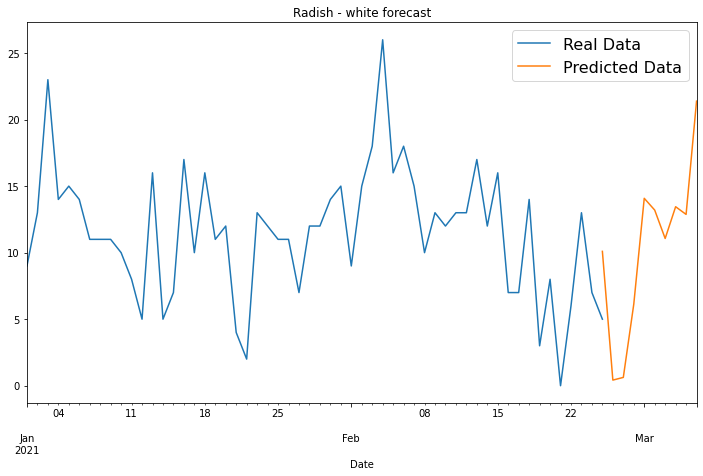

In [ ]:
plt.figure(figsize= (12,7))
type1[aba].plot()
future_df[aba+'_forecast'].plot()
plt.legend(('Real Data', 'Predicted Data'), fontsize=16)

plt.title(aba+' forecast')

In [ ]:
(test_data-(predictions))**2

Date
2021-02-14     2.025697
2021-02-15     1.148999
2021-02-16     0.214883
2021-02-17     6.041064
2021-02-18     5.604113
2021-02-19     3.834926
2021-02-20     0.014578
2021-02-21    48.705418
2021-02-22     0.706916
2021-02-23     3.086625
2021-02-24     2.014336
dtype: float64

In [ ]:
aba

'Radish - white'

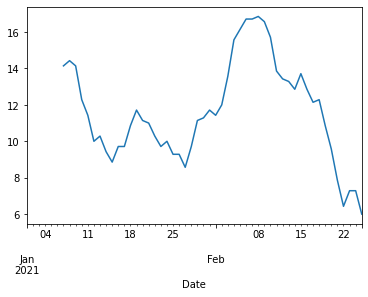

In [ ]:
type1['log']=type1[aba].rolling(window=7).mean().dropna()
type1['seasonal=log']=np.log(type1[aba].rolling(window=7).mean().dropna())
type1['log'].plot()


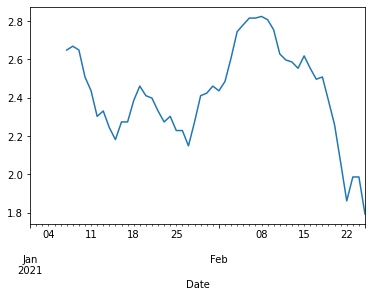

In [ ]:
type1['seasonal=log'].plot()

In [ ]:
arima_model = ARIMA(type1['log'].dropna(), order=(23,1,0))
arima_model_fit = arima_model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


LinAlgError: ignored

In [ ]:
type1['first-log']= type1['log']-type1['log'].shift(1)
result= adfuller(type1['first-log'].dropna())
print(result[1])


0.0003562986845451623


In [ ]:
result= adfuller(type1['log'].dropna())
print(result[1])

0.18951166878810655


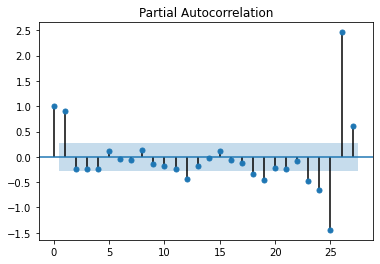

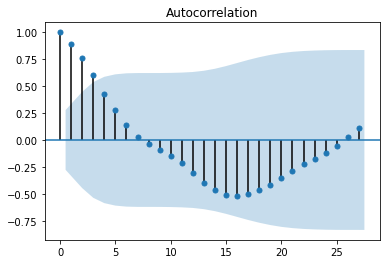

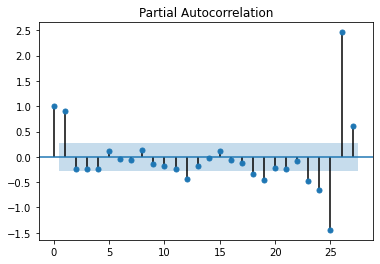

In [ ]:
plot_acf(type1['log'].dropna(), lags=27)
plot_pacf(type1['log'].dropna(), lags=27)